# Beam profiles and corresponding spectrum amplitudes

This notebook summarises formulas on which the corresponding Scheme configuration (`.ctl`) files are based. Furthermore it gives additional information, derivations and references.

In [1]:
## import of required modules 
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
from __future__ import print_function, division
from scipy.misc import derivative
from scipy import integrate

print("NumPy:", np.__version__)
print("SciPy:", sp.__version__)
print("Matplotlib:", mpl.__version__)

NumPy: 1.14.2
SciPy: 1.0.1
Matplotlib: 2.2.2


## 1 Gauss beam

### 1.1 Beam profile

### 1.2 Spectrum amplitude

## 2 Laguerre-Gauss (vortex) beam

### 2.1 Spectrum amplitude

The spectrum amplitude for Laguerre-Gaussian beams taken from eq. (2.22) in  \cite{Bliokh2013} is given by
\begin{align*}
|\tilde{\vec{E}}(\vec{k}))_{\perp B} \propto |\vec{e})_{\perp B}\, \theta^{|l|} \exp\bigl[-(kw_0)^2 \theta^2/4 \bigr] \exp(\mathrm{i} l \phi), \quad |\vec{e})_{\perp B} = (e_X, e_y)^\mathrm{T}
\end{align*}

with azimuthal angle

\begin{align*}
\phi = \mathrm{arctan2}(\tilde{k}_y, \tilde{k}_X) &= \mathrm{arctan2}\left(\cos \mu \sin \nu, \cos \nu \sin \mu\right)\\
&= \mathrm{arctan2}(\tan\nu, \tan\mu)
\end{align*}

and polar angle
\begin{equation*}
\theta = \arccos \tilde{k}_z = \arccos\left(\frac{\cos\mu\cos\nu}{\sqrt{1-\sin^2\mu \sin^2\nu}}\right).
\end{equation*}

## 3 Incomplete Airy beam

With regards to \cite{Ring2013} we substitute $X\equiv x/w_0$, $Z \equiv z/(2kw_0^2)$, $K_x\equiv k_xw_0$, $K\equiv kw_0$ and as characteristic inverse length, $\kappa \equiv 1/w_0$.

### 3.1 Beam profile

The beam profile at waist is defined by the incomplete Airy function, see \cite{Ring2013}

\begin{equation*}
\psi^\text{Airy}_{M,W}(x, z=0) = \frac{1}{2 \pi} \int_{M-W}^{M+W}\mathrm{d}\xi\, \mathrm{exp}\left[\mathrm{i}\left(\frac{1}{3} \xi^3 + \xi \frac{x}{w_0}\right)\right].
\end{equation*}

In [2]:
def Ai_inc(X, M, W):
    """Incomplete Airy function."""
    integrand = lambda xi: sp.exp(1j * ((xi**3)/3 + xi*X)) / (2*np.pi)
    
    re, re_err = integrate.quad(lambda xi: np.real(integrand(xi)), M - W, M + W)
    im, im_err = integrate.quad(lambda xi: np.imag(integrand(xi)), M - W, M + W)
    
    return re + im*1j

vec_Ai_inc = np.vectorize(Ai_inc)

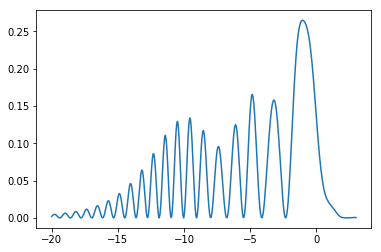

In [3]:
X = np.linspace(-20,3,400)
plt.plot(X, np.abs(vec_Ai_inc(X, 0, 4))**2);

### 3.2 Spectrum amplitude

\begin{align*}
f^\text{Airy}_{M,W}(k_x) &= \int_{-\infty}^\infty\mathrm{d}x\, \psi^\text{Airy}_{M,W}(x, z=0) \exp(-\mathrm{i}k_x x)\\
  &= \int_{M-W}^{M+W}\mathrm{d}\xi\, \exp\Bigl(\mathrm{i}\frac{1}{3}\xi^3 \Bigr) \delta\Bigl(\frac{\xi}{w_0} -k_x\Bigr)\\
  &=\begin{cases}
    w_0 \exp\Bigl[\mathrm{i} \frac{1}{3} \bigl(w_0k_x \bigr)^3\Bigr] & M-W < w_0k_x <M+W \\
    0                                                                  & \text{otherwise}
\end{cases}
\end{align*}

In [5]:
def f_Airy_inc(K_x, M, W):
    """Spectrum amplitude of the incomplete Airy beam."""
    return np.exp(1j*(K_x**3)/3) * np.heaviside(K_x - (M - W), 0) * np.heaviside(M + W - K_x, 0)

In [7]:
w_0 = 0.4138028520389279
k_x = 0.2
np.exp(1j*((w_0*k_x)**3)/3)

(0.9999999821487618+0.0001889509886083018j)

### 3.3 Paraxially propagating incomplete Airy beam

\begin{align*}
\psi^\text{Airy}_{M,W}(x, z) &= \frac{1}{2\pi}\int_{-\infty}^\infty \mathrm{d}k_x\, f^\text{Airy}_{M,W}(k_x) \exp\Bigl(\mathrm{i} z \sqrt{k^2 - k_x^2}\Bigr)\exp(\mathrm{i}k_x x) \\
\text{expanding square root} & \text{ up to second order}\\
&\simeq  \frac{w_0}{2\pi}\int_{(M-W)/w_0}^{(M+W)/w_0} \mathrm{d}k_x\, \exp\Bigl(\mathrm{i}\frac{1}{3}(k_xw_0)^3\Bigr) \exp\Bigl[\mathrm{i}z \Bigl(k - \frac{k_x^2}{2k}\Bigr)\Bigr]\exp(\mathrm{i}k_x x)\\
\text{apply transformations }& z \to 2kw_0^2 Z \text{ and }  k_x \to  k_x^\prime + Z/w_0\\
&= \frac{w_0}{2\pi}\exp\Bigl[\mathrm{i}\Bigl(zk + \frac{x}{w_0}Z(z)-\frac{2}{3}Z^3(z)\Bigr)\Bigr] \psi^\text{Airy}_{M-Z(z)/w_0,W}(x-w_0Z^2(z), z=0) 
\end{align*} 

In [5]:
def phase(K_x, K, X, Z):
    return -(K_x**3)/3 - 2*K*Z*sp.sqrt(K**2 - K_x**2) - K_x*X

def stat_points(X, Z):
    return [Z - sp.sqrt(-X + Z**2), Z + sp.sqrt(-X + Z**2)]

[1.5505102572168221, 6.449489742783178]


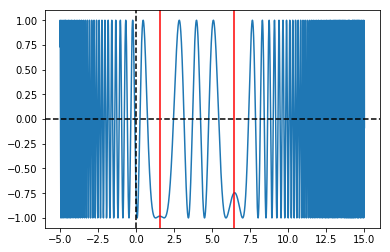

In [6]:
K_x = np.linspace(-5,15,10000)
X, Z = 10, 4  # x < Z**2
print(stat_points(X, Z))

plt.plot(K_x, np.exp(-1j*phase(K_x, 100, X, Z)).real)  # K must be large
plt.axhline(0, color='k', ls='--')
plt.axvline(0, color='k', ls='--')
plt.axvline(stat_points(X, Z)[0], color='red', ls='-')
plt.axvline(stat_points(X, Z)[1], color='red', ls='-');

In [7]:
def AiB_inc_exa(X, Z, M, W, K):
    """Exact incomplete Airy beam."""
    integrand = lambda K_x: sp.exp(1j*((K_x**3)/3 + 2*K*Z*np.sqrt(K**2 - K_x**2) + K_x*X)) /\
                            (2*np.pi)
    
    re, re_err = integrate.quad(lambda K_x: np.real(integrand(K_x)), M - W, M + W)
    im, im_err = integrate.quad(lambda K_x: np.imag(integrand(K_x)), M - W, M + W)
    
    return re + im*1j

vec_AiB_inc_exa = np.vectorize(AiB_inc_exa)

In [8]:
def AiB_inc_par(X, Z, M, W, K):
    """Paraxial incomplete Airy beam."""
    return np.exp(1j*(2*(K**2)*Z + X*Z - 2*(Z**3)/3)) * Ai_inc(X - Z**2, M-Z, W)

vec_AiB_inc_par = np.vectorize(AiB_inc_par)

In [9]:
X_, Z_, K_ = 4, 10.5, 100
print("exact:   ", AiB_inc_exa(X_, Z_, 0, 4, K_), np.abs(AiB_inc_exa(X_, Z_, 0, 4, K_))**2)
print("paraxial:", AiB_inc_par(X_, Z_, 0, 4, K_), np.abs(AiB_inc_par(X_, Z_, 0, 4, K_))**2)

exact:    (-0.0829813635712+0.0148665451131j) 0.007106920863737285
paraxial: (-0.08302669783638711+0.01511560051284888j) 0.007121913932478765


In [10]:
X = np.linspace(-30, 30, 200)
Z = np.linspace( -2,  5, 100)
Xm, Zm = np.meshgrid(X, Z)

In [11]:
airy_beam_field_par = vec_AiB_inc_par(Xm, Zm, 0, 4, 10)

In [12]:
airy_beam_field_exa = vec_AiB_inc_exa(Xm, Zm, 0, 4, 10)

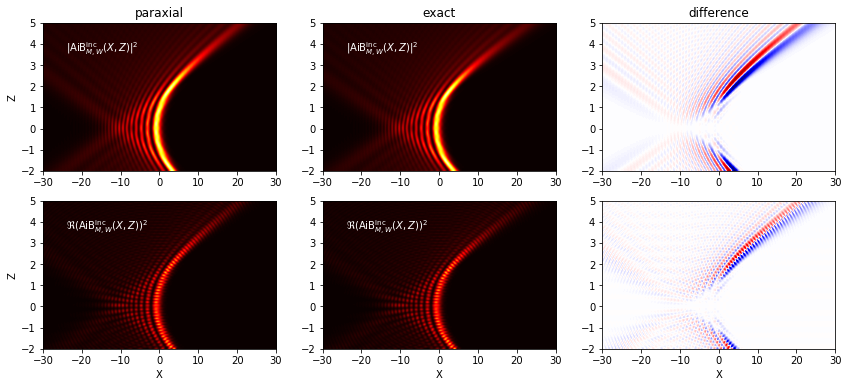

In [14]:
# visualisation
scale_factor = 1   # 2*kw_0
extent = np.min(X), np.max(X), scale_factor*np.min(Z), scale_factor*np.max(Z)
diff_real = np.real(airy_beam_field_par)**2 - np.real(airy_beam_field_exa)**2
diff_abs  = np.abs( airy_beam_field_par)**2 - np.abs( airy_beam_field_exa)**2

class MidpointNormalize(mpl.colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

fig, axes = plt.subplots(figsize=(14.2,6),nrows=2, ncols=3)
args = {'origin': 'lower', 'extent': extent, 'aspect': 'auto', 'interpolation': 'bicubic'}
norm=MidpointNormalize(midpoint=0)

a=axes[0,0]; b=axes[0,1]; c=axes[0,2] # first row
d=axes[1,0]; e=axes[1,1]; f=axes[1,2] # second row

a.imshow(np.abs(airy_beam_field_par)**2, cmap=plt.cm.hot, **args);  a.set_title("paraxial");
b.imshow(np.abs(airy_beam_field_exa)**2, cmap=plt.cm.hot, **args);  b.set_title("exact");
c.imshow(diff_abs, cmap=plt.cm.seismic, norm=norm, **args);         c.set_title("difference");

d.imshow(np.real(airy_beam_field_par)**2, cmap=plt.cm.hot, **args); 
e.imshow(np.real(airy_beam_field_exa)**2, cmap=plt.cm.hot, **args); 
f.imshow(diff_real, cmap=plt.cm.seismic, norm=norm, **args);        

a.text(0.1, 0.8, r"$|\mathrm{AiB}^\mathrm{inc}_{M,W}(X,Z)|^2$", color="w", transform=a.transAxes)
b.text(0.1, 0.8, r"$|\mathrm{AiB}^\mathrm{inc}_{M,W}(X,Z)|^2$", color="w", transform=b.transAxes)

d.text(0.1, 0.8, r"$\Re(\mathrm{AiB}^\mathrm{inc}_{M,W}(X,Z))^2$", color="w", transform=d.transAxes)
e.text(0.1, 0.8, r"$\Re(\mathrm{AiB}^\mathrm{inc}_{M,W}(X,Z))^2$", color="w", transform=e.transAxes)

axes[0,0].set_ylabel('Z'); axes[1,0].set_ylabel('Z')
for ax in axes[1]:
    ax.set_xlabel('X')

# References

[<a id="cit-Bliokh2013" href="#call-Bliokh2013">Bliokh2013</a>] Bliokh K and Aiello A, _Goos-Hänchen and Imbert-Fedorov beam shifts: an overview_, Journal of Optics, vol. 15, number 1, pp. 014001,  2013.

[<a id="cit-Ring2013" href="#call-Ring2013">Ring2013</a>] Ring J, Howls C and Dennis M, _Incomplete Airy beams: finite energy from a sharp spectral cutoff_, Optics Letters, vol. 38, number 10, pp. 1639–1641, May 2013.

